<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
y_test

0        1
1        1
2        1
3        1
4        1
        ..
49997    0
49998    0
49999    0
50000    0
50001    0
Name: indicator_link, Length: 50002, dtype: int64

In [6]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

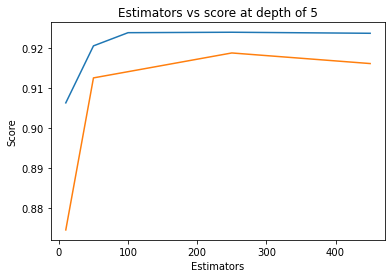

In [7]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


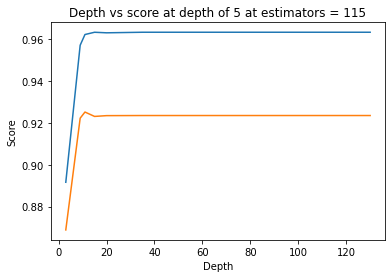

In [8]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [9]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25, return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225042 0.96215492 0.9605708  0.96194014 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [10]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [11]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [12]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [13]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [14]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


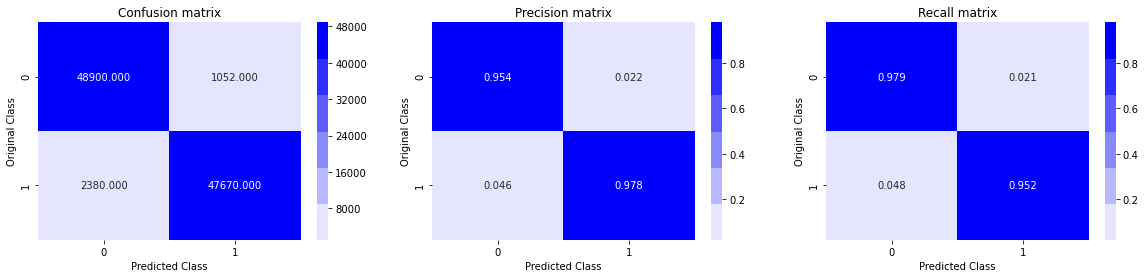

Test confusion_matrix


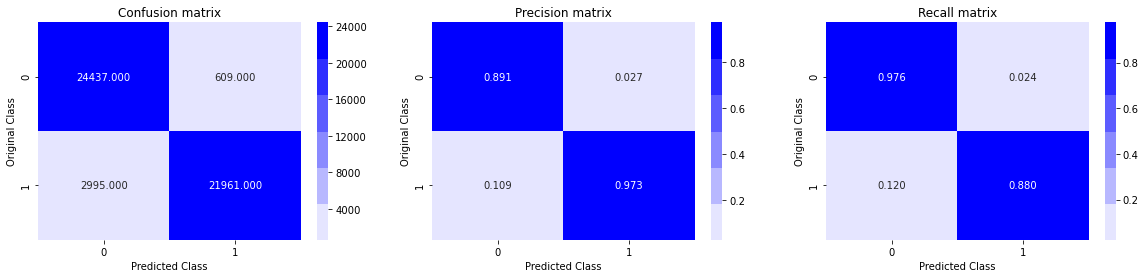

In [15]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

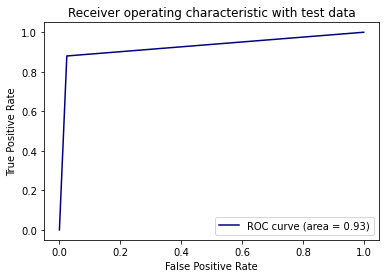

In [16]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

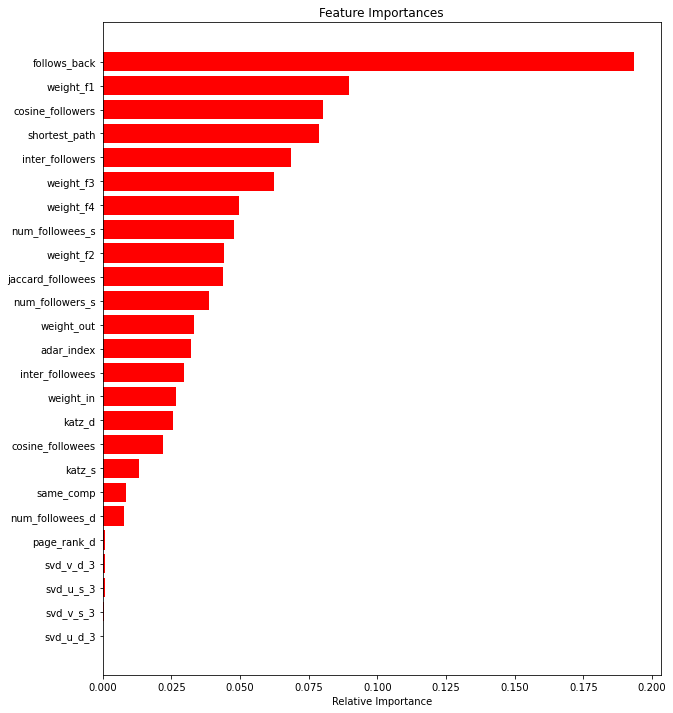

In [17]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

### 3. Tune hyperparameters for XG boost with all these features and check the error metric.

#### 1. Function to Evaluate Model

In [18]:
from sklearn import metrics
def perf_measure(Y_true, Y_predicted, model = None):
    print("Classification Report : ")
    print(metrics.classification_report(Y_true, Y_predicted))
    print('-'*45)
    print("Accuracy Score is : ", metrics.accuracy_score(Y_true, Y_predicted))
    print('-'*45)
    #print("Confusion Metrics is : ")
    #confusion_matrics = metrics.confusion_matrix(Y_true, Y_predicted)
    #print(confusion_matrics)
    if model:
        print("Best Parameters are:", model.best_params_)

#### 2. Function to Plot Heatmap

In [19]:
import seaborn as sns
def plot_heatmap(model): 
    print("Heatmap :")
    cv_results = pd.DataFrame(model.cv_results_)
    heatmap_data = cv_results[['param_n_estimators', 'param_max_depth', 'mean_test_score', 'mean_train_score']]
    
    #reference https://www.youtube.com/watch?v=Gj-prU8aEgg&ab_channel=ArtofVisualization    
    train_score = heatmap_data.pivot('param_n_estimators', 'param_max_depth', 'mean_train_score')
    test_score = heatmap_data.pivot('param_n_estimators', 'param_max_depth', 'mean_test_score')
    
    heatmap, axis = plt.subplots(1,2, figsize=(10,4))
    sns.heatmap(train_score, annot=True, ax=axis[0], linewidths=2, linecolor='white', cmap="BuPu")
    sns.heatmap(test_score, annot=True, ax=axis[1], linewidths=2, linecolor='white', cmap = 'BuPu')

    axis[0].set_title('Train Set')
    axis[1].set_title('CV Set')

    plt.show()
    print('-'*45)

#### Loading Data

In [20]:
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage5.h5', 'train_df', mode='r')
df_final_test = read_hdf('storage_sample_stage5.h5', 'test_df', mode='r')

In [21]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'pref_attch_followers', 'pref_attch_followees', 'svd_dot'],
      dtype='object')

In [22]:
import xgboost as xgb

#Setting Up Target Variables
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

#Dropping unwanted columns for modeling
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

#xgb_model = xgb.XGBClassifier().fit(df_final_train, y_train)
#y_pred_test = xgb_model.predict(df_final_test)

#### Hyperparameter Tuning

depth =  3 Train Score 0.9735434729762581 test Score 0.927852099985159
depth =  9 Train Score 0.9862225129572787 test Score 0.9285487052236432
depth =  11 Train Score 0.992923889150967 test Score 0.9273664778152652
depth =  15 Train Score 0.9995202494702754 test Score 0.9270983620470169
depth =  20 Train Score 1.0 test Score 0.9289617486338797
depth =  35 Train Score 1.0 test Score 0.9307240373642166
depth =  50 Train Score 1.0 test Score 0.9307240373642166
depth =  70 Train Score 1.0 test Score 0.9307240373642166
depth =  130 Train Score 1.0 test Score 0.9307240373642166


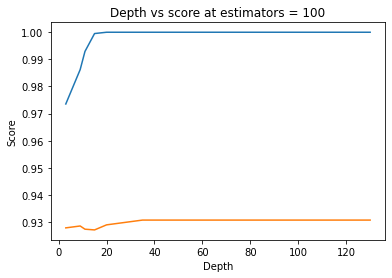

Wall time: 24min 39s


In [23]:
%%time
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = xgb.XGBClassifier(max_depth=i,learning_rate=0.1,n_estimators=100,
                            verbosity=1,silent=None, booster='gbtree',
                            n_jobs=1,nthread=None,gamma=0,
                            min_child_weight=1,max_delta_step=0,subsample=1,
                            colsample_bytree=1,colsample_bylevel=1,
                            colsample_bynode=1,reg_alpha=0,
                            reg_lambda=1,scale_pos_weight=1,
                            base_score=0.5).fit(df_final_train, y_train)

    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at estimators = 100')
plt.show()

estimators =  10 Train Score 0.9302179379715004 test Score 0.9264801835364441
estimators =  50 Train Score 0.9722781950296148 test Score 0.9322508161275279
estimators =  100 Train Score 0.9763733317143753 test Score 0.9300285986653957
estimators =  250 Train Score 0.9857746478873238 test Score 0.9274272360314425
estimators =  450 Train Score 0.9942403814369998 test Score 0.9214471829481867


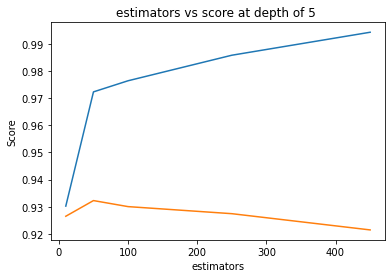

Wall time: 8min 41s


In [24]:
%%time
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=i,
                            verbosity=1,silent=None, booster='gbtree',
                            n_jobs=1,nthread=None,gamma=0,
                            min_child_weight=1,max_delta_step=0,subsample=1,
                            colsample_bytree=1,colsample_bylevel=1,
                            colsample_bynode=1,reg_alpha=0,
                            reg_lambda=1,scale_pos_weight=1,
                            base_score=0.5).fit(df_final_train, y_train)

    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('estimators')
plt.ylabel('Score')
plt.title('estimators vs score at depth of 5 ')
plt.show()

### Hyperparameter Tuning Using Gridsearch

In [25]:
from sklearn.model_selection import KFold, GridSearchCV

In [26]:
%%time

model =xgb.XGBClassifier(verbosity=1).fit(df_final_train, y_train)


hyper_parameters = {'max_depth':[2,3,4,5,9,11],'learning_rate': [0.50, 0.1],'n_estimators': [5,10,15,30,50,100],
                    'gamma': [0],'min_child_weight' : [1],'max_delta_step':[0],
                    'subsample':[1],'colsample_bytree':[1],'colsample_bylevel':[1],
                    'colsample_bynode':[1],'reg_alpha':[0],'reg_lambda':[1],
                    'scale_pos_weight':[1],'base_score':[0.5]}

folds = KFold(n_splits=3, shuffle=False, random_state=None)

XGBoost_cv = GridSearchCV(estimator=model,
                        param_grid= hyper_parameters,
                        scoring='f1',
                        cv=folds,
                        return_train_score=True,
                        n_jobs =-1)

XGBoost_cv.fit(df_final_train, y_train)
y_pred_test = XGBoost_cv.predict(df_final_test)
#y_pred_train = XGBoost_cv.predict(df_final_train)

XGBoost_results = pd.DataFrame(XGBoost_cv.cv_results_).head()

best_parameters = XGBoost_cv.best_params_
max_depth_best = best_parameters['max_depth']
learning_rate_best = best_parameters['learning_rate']
n_estimators_best = best_parameters['n_estimators']

print("Best Parameters are: ", best_parameters)
print("-"*50)
print("Representation of the Results")
#plot_heatmap(model=XGBoost_cv)

Best Parameters are:  {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.5, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1}
--------------------------------------------------
Representation of the Results
Wall time: 27min 39s


**Training Model with Best Parameters**

Representation of the Results
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     25046
           1       0.98      0.86      0.92     24956

    accuracy                           0.92     50002
   macro avg       0.93      0.92      0.92     50002
weighted avg       0.93      0.92      0.92     50002

---------------------------------------------
Accuracy Score is :  0.9249830006799729
---------------------------------------------


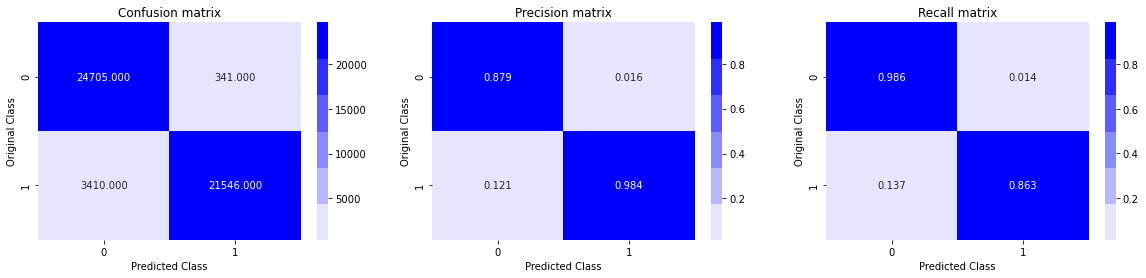

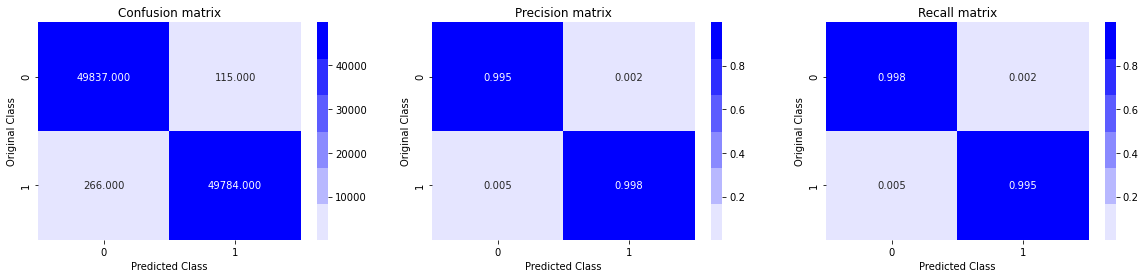

In [27]:
XGBoost_best = XGBoost_cv.best_estimator_
XGBoost_best.fit(df_final_train, y_train)
XGBoost_best.score(df_final_test, y_test)

y_pred_test = XGBoost_best.predict(df_final_test)
y_pred_train = XGBoost_best.predict(df_final_train)

print("Representation of the Results")
perf_measure(y_test, y_pred_test)
#plot_AUC(X_train_TFIDF_df_clean, y_train_df_clean, X_test_TFIDF_df_clean, y_test_df_clean, XGBoost_best)
print("for Test Data")
plot_confusion_matrix(y_test, y_pred_test)
print("for Train Data")
plot_confusion_matrix(y_train, y_pred_train)

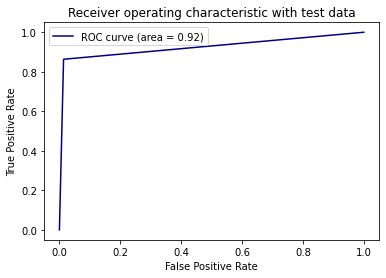

In [28]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_pred_test)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

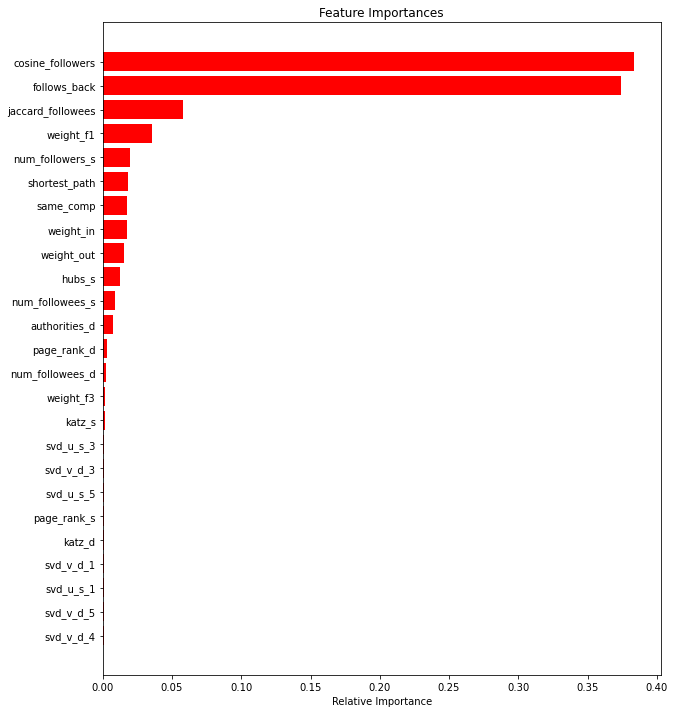

In [29]:
features = df_final_train.columns
importances = XGBoost_best.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [44]:
print("Features and their importance values :")
pd.DataFrame(dict(zip(features,importances)), index=[i for i in range(len(importances))]).T[0]

Features and their importance values :


jaccard_followers       0.000000
jaccard_followees       0.057999
cosine_followers        0.383583
cosine_followees        0.000000
num_followers_s         0.019968
num_followees_s         0.008810
num_followees_d         0.002178
inter_followers         0.000000
inter_followees         0.000000
adar_index              0.000000
follows_back            0.374063
same_comp               0.017655
shortest_path           0.018453
weight_in               0.017446
weight_out              0.015254
weight_f1               0.035449
weight_f2               0.000334
weight_f3               0.001555
weight_f4               0.000621
page_rank_s             0.000981
page_rank_d             0.003351
katz_s                  0.001323
katz_d                  0.000967
hubs_s                  0.012406
hubs_d                  0.000397
authorities_s           0.000616
authorities_d           0.007225
svd_u_s_1               0.000943
svd_u_s_2               0.000841
svd_u_s_3               0.001241
svd_u_s_4 

________